## Benoit Schick & Muhammed Ali Ulucinar & Lorend Dalloshi
# PW4 - Linear Regression

## Imports

In [333]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [334]:
datafile = "lausanne-appart.csv"

Read the data

In [335]:
dataset = pd.read_csv(datafile)

Display first rows

In [336]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

(array([36., 56., 44., 34., 12.,  4.,  7.,  5.,  2.,  1.]),
 array([ 685. , 1354.8, 2024.6, 2694.4, 3364.2, 4034. , 4703.8, 5373.6,
        6043.4, 6713.2, 7383. ]),
 <BarContainer object of 10 artists>)

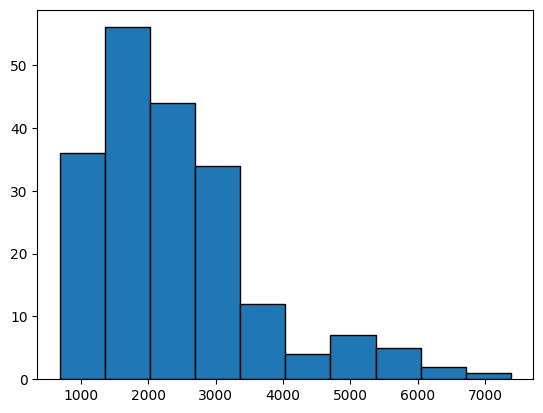

In [337]:
# Your code here
plt.hist(dataset["rent_price"], bins=10, edgecolor='black')

b) Plot a histogram to visualize the distribution of the living area

(array([31., 34., 44., 38., 27., 14.,  6.,  4.,  2.,  1.]),
 array([ 13. ,  35.7,  58.4,  81.1, 103.8, 126.5, 149.2, 171.9, 194.6,
        217.3, 240. ]),
 <BarContainer object of 10 artists>)

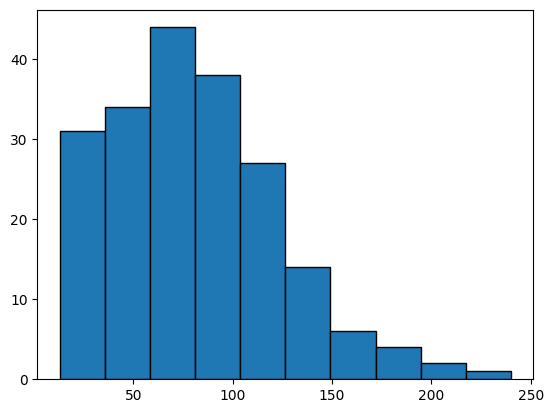

In [338]:
# Your code here
plt.hist(dataset["living_area"], bins=10, edgecolor='black')

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'rent price')

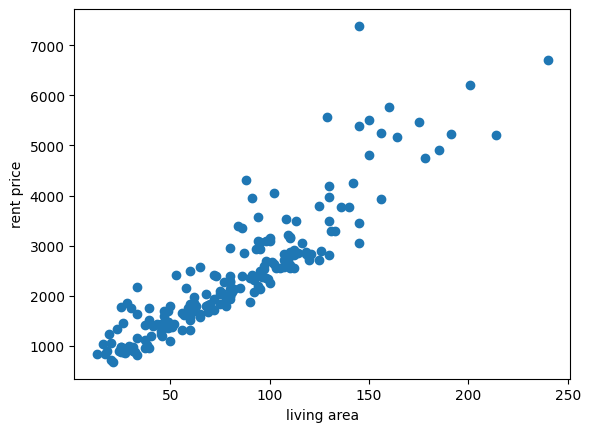

In [339]:
# Your code here
plt.scatter(dataset["living_area"], dataset["rent_price"])
plt.xlabel("living area")
plt.ylabel("rent price")

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

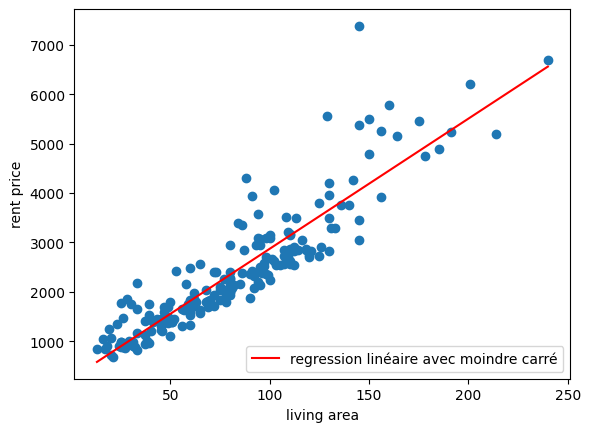

In [340]:
# Your code here
# système equation : X*thetha = y (resolution moindre carre)

#X = [1 x1]      y = [y1]
#    [1 x2]          [y2]
#    ...             ...
#    [1 xn]          [yn]

living_area = np.array(dataset["living_area"])
rent_price = np.array(dataset["rent_price"])

X = np.column_stack((np.ones(living_area.shape[0]), living_area))
y = rent_price
theta_closed_form = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(min(living_area), max(living_area), 100)
y_plot = theta_closed_form[0] + theta_closed_form[1] * x_plot

plt.scatter(living_area, rent_price)
plt.plot(x_plot, y_plot, label="regression linéaire avec moindre carré", color='red')
plt.xlabel("living area")
plt.ylabel("rent price")
plt.legend()
plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [341]:
N = len(dataset["living_area"])
x_n = np.array(dataset["living_area"])
y_n = np.array(dataset["rent_price"])

def cost_value(theta_0, theta_1, x, y):
    h_theta = theta_0 + theta_1 * x
    J_theta = np.sum((h_theta - y) ** 2) / (2 * len(y))
    return J_theta

print("cost value = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))


cost value =  138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [342]:
# Your code here

def gradient_descent(nb_iteration, x, y, alpha):
    theta_0 = 0
    theta_1 = 0
    

    for n in range(nb_iteration):
        
        # Calcul du gradient sur tout le training set et mise à jour des paramètres theta
        h_theta = theta_0 + theta_1 * x
        error = h_theta - y

        term_th0 = np.sum(error*1)
        term_th1 = np.sum(error*x)

        ## Avec for i in range(N) --> BEAUCOUP TROP LONG !!
                    
        theta_0 -= alpha*(1/N)*term_th0
        theta_1 -= alpha*(1/N)*term_th1
    
    return np.array([theta_0, theta_1])
    


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

Text(0, 0.5, 'cost value')

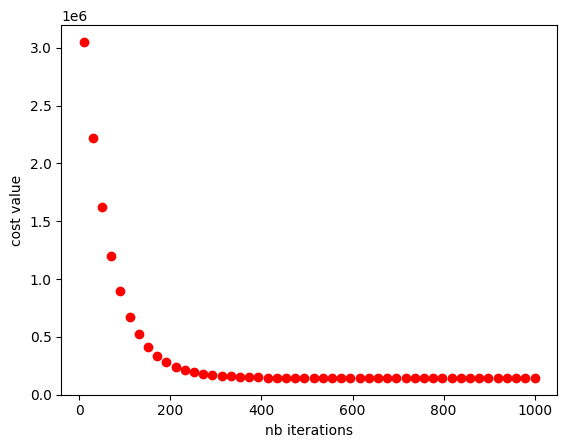

In [343]:
# Your code here
size = 50
alpha = 0.000001
x_ite = np.linspace(10, 1000, size, dtype=int)
y_cost = np.zeros(size)

for i in range(size):
    theta = gradient_descent(x_ite[i], x_n, y_n, alpha)
    y_cost[i] = cost_value(theta[0], theta[1], x_n, y_n)

plt.scatter(x_ite, y_cost, color='red')
plt.xlabel("nb iterations")
plt.ylabel("cost value")



    

**ANSWER** : Plus le nombre d'itérations augmente, plus on converge vers le minimum global, et donc plus on réduit le cout J_theta. On observe cependant, qu'au bout d'un certains nombre d'itérations, le cout ne change pas, ou très peu. Si ce cout résiduel nous satisfait, on pourrait alors s'arrêter à environ 400 itérations, sinon il faudrait encore réduire le terme alpha pour améliorer la finesse de la convergence.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

**ANSWER** : On peut soit fixer un nombre d'itérations (epochs), soit on s'arrête au bout d'un certain coût qui nous satisfasse qu'on évalue selon la formule suivante : \
**(J_theta_epoch_n1 - J_theta_epoch_n)/J_theta_epoch_n  < epsilon**, avec epsilon le cout minimum à fixer selon l'application

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

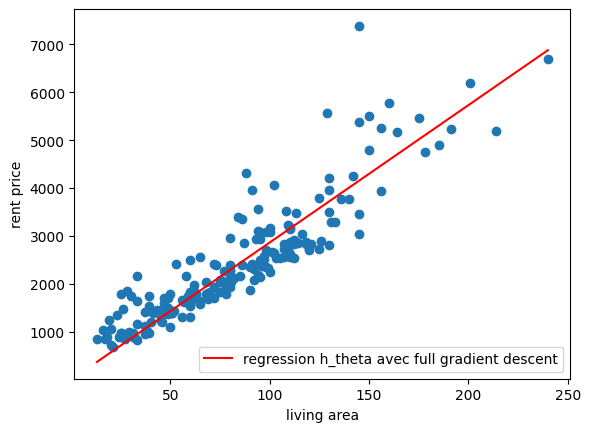

In [344]:
nb_ite = 1000
alpha = 0.000001

theta_full_gradient = gradient_descent(nb_ite, x_n, y_n, alpha)
x_plot = np.linspace(min(living_area), max(living_area), 100)
y_plot = theta_full_gradient[0] + theta_full_gradient[1] * x_plot

plt.scatter(living_area, rent_price)
plt.plot(x_plot, y_plot, label="regression h_theta avec full gradient descent", color='red')
plt.xlabel("living area")
plt.ylabel("rent price")
plt.legend()
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [345]:
print("cost value closed form = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))
print("cost value full gradient descent avec 1000 itération et alpha = 0.000001 = ", cost_value(theta_full_gradient[0], theta_full_gradient[1], x_n, y_n))

cost value closed form =  138034.95779787414
cost value full gradient descent avec 1000 itération et alpha = 0.000001 =  144159.35280506394


**ANSWER** : La solution avec les moindre carrés (closed form) donne la solution exacte de la régression linéaire mais est beaucoup plus couteuse si X est très grand. La méthode gradient descent, beaucoup plus avantageuse en terme de calcul si X est grand, donne une approximation d'une droite de regression, obtenue après 1000 itérations avec un alpha = 0.000001. Celle-ci donne un coût environ 4.2% plus élevé que le cout avec moindre carré. Pour réduire l'écart, il vaut "tuner" les paramètres alpha et nbre itérations

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [346]:
def stochastic_gradient(nb_iterations, x, y, alpha) :

    theta_0 = 0
    theta_1 = 0
    
    for i in range(nb_iterations) :
            # choix d'un sample random
            indice_sample = random.randint(1, x.size-1)
            x_random = x[indice_sample]
            y_random = y[indice_sample]

            # calcul de theta
            h_theta = theta_0 + theta_1 * x_random
            theta_0 -= alpha*(h_theta-y_random)*1          #new theta_0
            theta_1 -= alpha*(h_theta-y_random)*x_random   #new theta_1

    return np.array([theta_0, theta_1])



a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

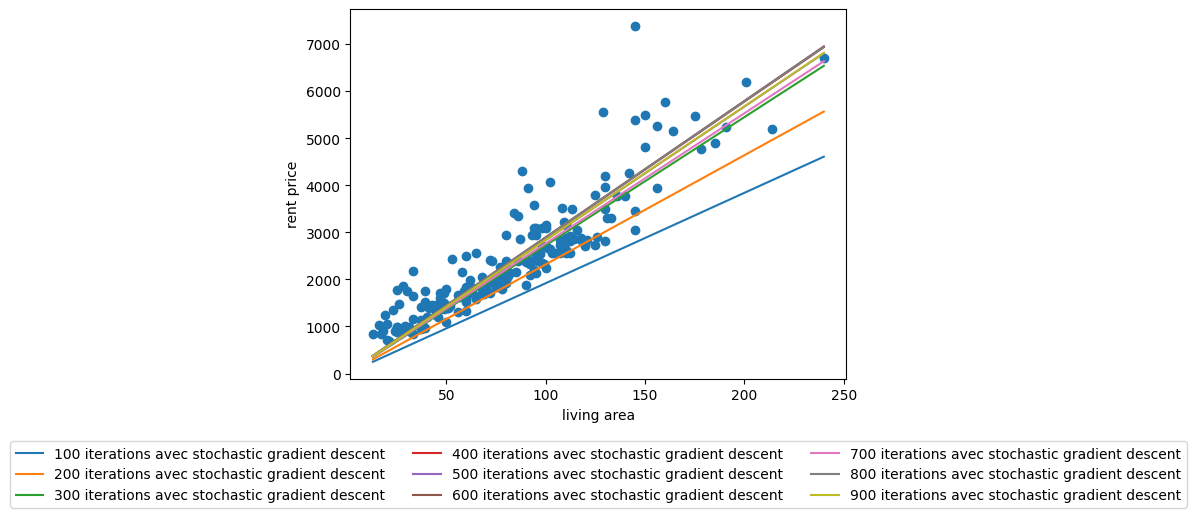

In [347]:
alpha = 0.000001

for i in range(100,1000,100):
    theta_stochastic_gradient = stochastic_gradient(i, x_n, y_n, alpha)
    x_plot = np.linspace(min(living_area), max(living_area), 100)
    y_plot = theta_stochastic_gradient[0] + theta_stochastic_gradient[1] * x_plot

    plt.plot(x_plot, y_plot, label=f"{i} iterations avec stochastic gradient descent")

plt.scatter(living_area, rent_price)
plt.xlabel("living area")
plt.ylabel("rent price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

b) How many samples do you need to visit for reaching the convergence?

**ANSWER** : Pour atteindre la convergence avec un alpha de 0.000001 il faut au moins 400 itérations, donc 400 samples choisis de manière random

c) What kind of stopping criterion could we use here?

**ANSWER** : Avec le stochastic gradient, on calcul, à chaque itération, le gradient à partir d’un seul échantillon. Celui-ci varie ainsi selon l'échantillon choisi et est donc non stable. C'est pourquoi, au lieu de s'arrêter au bout d'un certain coût J_theta minimum (ce qui serait une mauvaise pour le stochastic) comme pour le full gradient descent, il faut calculer la moyenne des couts sur les U dernières mise à jour (avec U < N).


d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [348]:
print("cost value closed form = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))
print("cost value full gradient descent avec 1000 itération et alpha = 0.000001 = ", cost_value(theta_full_gradient[0], theta_full_gradient[1], x_n, y_n))

theta_stochastic_gradient = stochastic_gradient(1000, x_n, y_n, 0.000001)
print("cost value stochastic gradient descent avec 1000 itération et alpha = 0.000001 = ", cost_value(theta_stochastic_gradient[0], theta_stochastic_gradient[1], x_n, y_n))

cost value closed form =  138034.95779787414
cost value full gradient descent avec 1000 itération et alpha = 0.000001 =  144159.35280506394
cost value stochastic gradient descent avec 1000 itération et alpha = 0.000001 =  144200.6569812619


**ANSWER** : Le stochastic gradient donne des valeurs de coût très similaire à la methode du full gradient descent (0.38% de différence). Cependant en terme de calcul, le stochastic gradient est beaucoup plus intéressent, car à chaque update de theta, on ne calcule pas le gradient sur tout le training set. Pour conclure, dans ce cas, la méthode du stochastic gradient est beaucoup plus intéressent pour calculer une régression linéaire à condition que le nombre d'itérations est suffisantes (et que le alpha est correctement choisi évidemment)

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

**ANSWER** : Pour plusieurs raisons :
1) Si X devient très grand, il est préférable d'utiliser le gradient descent (dans la closed form solution, il faut inverser la matrice X, un cauchemar...)
2) Si l'on doit rajouter des échantillons dans le training set, on n'est pas obligé de tout recalculer avec le gradient descent, qui est lui, un processus itératif.

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

**ANSWER** : Les outliers ont une grande influence dans ce type de gradient car la fonction J(theta) calcul l'erreur au carré --> (h_theta(x_outliers)-y_outliers)^2. Le J(theta) sera donc important et va fortement corriger la valeur de theta de la droite de régression. Si on a beaucoups d'outliers, la gradient aura de la peine à converger vers un minimum globale.

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

**ANSWER** : Si alpha est trop petit, la convergence sera très lente. Si trop grand, l'updates des theta sera drastique et l'algo peut diverger. La stratégie est d'avoir un alpha dynamique : au début alpha doit être assez grand pour sortir (ou éviter) d'un minimum local et converger assez rapidement. Puis il faut le diminuer pour affiner la recherche du minimum globale et atteindre le Jcost minimum voulu.

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

**ANSWER** : Pour que le gradient descend ne diverge pas, il faut normaliser les valeurs de x. La manière de procéder est décrit dans l'exercice 7a.

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

**ANSWER** : Oui, par la brute force :

mean_square = 0 \
tab = 0 \
for i de 0 à 10000 : #nb iteration à tune\
    &ensp; choix random de theta0 et theta1 # interval de valeurs random depend du dataset\
    &ensp; mean square error = 1/(2N) * somme( (theta0 + theta1*xn[i] - yn[i])^2 ) de n=1 à N\
    &ensp; tab.append{theta0, theta1, mean_squarre_error}

prendre theta0 et theta1 avec le plus petit mean squarre error
    

## Exercice 6 -  Optional – Mini-batch gradient descent for linear regression

Implement the mini-batch gradient descent algorithm for the previous problem, adding a parameter B defining the size of the mini-batch. Check that when B = N, you fall back on the batch gradient descent solution, and when B = 1, you get the behaviour of stochastic gradient descent.


In [349]:
def mini_batch_gradient(nb_iterations, x, y, alpha, B) :

    N = x.size
    theta_0 = 0
    theta_1 = 0
    batch_training_set = []
 
    for i in range(nb_iterations) :
            # Création d'un mini batch de taille B 
            indices = np.random.choice(N, size=B, replace=False)
            x_batch = x[indices]
            y_batch = y[indices]
                
            # Calcul du gradient sur le batch training set et mise à jour des paramètres theta
            h_theta = theta_0 + theta_1 * x_batch
            error = h_theta - y_batch
            
            term_th0 = np.sum(error*1)
            term_th1 = np.sum(error*x_batch)
        
            theta_0 -= alpha*(1/B)*term_th0    #new theta_0
            theta_1 -= alpha*(1/B)*term_th1    #new theta_1
    return np.array([theta_0, theta_1])



In [350]:
print("cost value closed form = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))
print("cost value full gradient descent avec 1000 itération et alpha = 0.000001 = ", cost_value(theta_full_gradient[0], theta_full_gradient[1], x_n, y_n))

#theta_stochastic_gradient = stochastic_gradient(1000, x_n, y_n, 0.000001)
#print("cost value stochastic gradient descent avec 1000 itération et alpha = 0.000001 = ", cost_value(theta_stochastic_gradient[0], theta_stochastic_gradient[1], x_n, y_n))

#theta_mini_batch_gradient = mini_batch_gradient(1000, x_n, y_n, 0.000001, 1)
#print("cost value mini batch gradient descent avec 1000 itération, alpha = 0.000001, B=1 (stochastic) = ", cost_value(theta_mini_batch_gradient[0], theta_mini_batch_gradient[1], x_n, y_n))

theta_mini_batch_gradient = mini_batch_gradient(1000, x_n, y_n, 0.000001, N)
print("cost value mini batch gradient descent avec 1000 itération, alpha = 0.000001, B=N (full gradient) = ", cost_value(theta_mini_batch_gradient[0], theta_mini_batch_gradient[1], x_n, y_n))

cost value closed form =  138034.95779787414
cost value full gradient descent avec 1000 itération et alpha = 0.000001 =  144159.35280506394
cost value mini batch gradient descent avec 1000 itération, alpha = 0.000001, B=N (full gradient) =  144159.35280506394


**REMARQUE** : Pour le full batch gradient descent, on obtient bien le même résultat en prenant B=N, comme on peut le voir avec les cost values. A noter qu'on ne peut pas faire la même comparaison avec le stochastic gradient descent, vue que le coût varie (l'algorithme ne converge pas vraiment, il oscille autour du minimum)

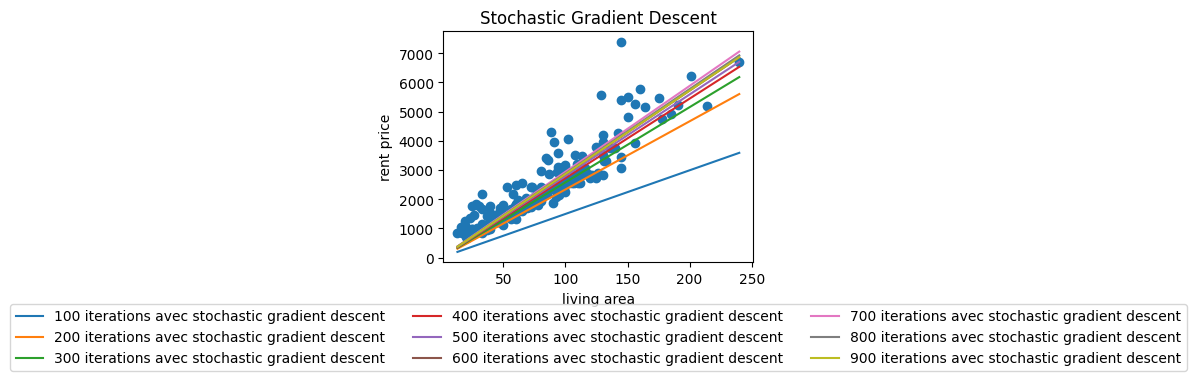

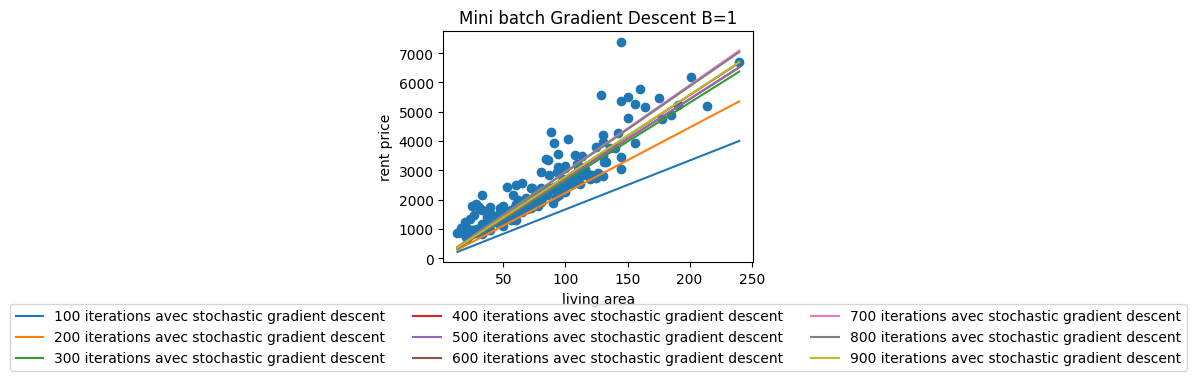

In [353]:
alpha = 0.000001
B = 1

## Stochastic gradient 

plt.figure(figsize=(4, 3))
for i in range(100,1000,100):
    theta_stochastic_gradient = stochastic_gradient(i, x_n, y_n, alpha)
    x_plot = np.linspace(min(living_area), max(living_area), 100)
    y_plot = theta_stochastic_gradient[0] + theta_stochastic_gradient[1] * x_plot

    plt.plot(x_plot, y_plot, label=f"{i} iterations avec stochastic gradient descent")

plt.scatter(living_area, rent_price)
plt.xlabel("living area")
plt.ylabel("rent price")
plt.title("Stochastic Gradient Descent")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


## Mini Batch gradient

plt.figure(figsize=(4, 3))
for i in range(100,1000,100):
    theta_mini_batch_gradient = mini_batch_gradient(i, x_n, y_n, alpha, B)
    x_plot = np.linspace(min(living_area), max(living_area), 100)
    y_plot = theta_mini_batch_gradient[0] + theta_mini_batch_gradient[1] * x_plot

    plt.plot(x_plot, y_plot, label=f"{i} iterations avec stochastic gradient descent")

plt.scatter(living_area, rent_price)
plt.xlabel("living area")
plt.ylabel("rent price")
plt.title("Mini batch Gradient Descent B=1")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)



**REMARQUE** : Comme on peut le voir sur ces deux graphes, le comportement du mini batch gradient descent avec B=1 est similaire au stochastic gradient descent

## Exercice 7 Optional – multi-variable linear regression

a) Implement one of the gradient descent algorithm (ex. 3-5) for the multi-variable linear
regression assuming x1 being the living area and x2 the square of the living area. Plot the
computed curve (second order) on top of the scatter plot of exercise 1. Do you observe
a reduction in the loss ?

In [354]:
def gradient_descent_multi_variable(nb_iteration, x1, x2, y, alpha):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    
    for n in range(nb_iteration):
        
        # Calcul du gradient sur tout le training set et mise à jour des paramètres theta
        h_theta = theta_0 + theta_1 * x1 + theta_2 * x2**2
        error = h_theta - y

        term_th0 = np.sum(error*1)
        term_th1 = np.sum(error*x1)
        term_th2 = np.sum(error*x2**2)

        ## Avec for i in range(N) --> BEAUCOUP TROP LONG !!
                    
        theta_0 -= alpha*(1/N)*term_th0
        theta_1 -= alpha*(1/N)*term_th1
        theta_2 -= alpha*(1/N)*term_th2
    
    return np.array([theta_0, theta_1, theta_2])

def cost_value_multi(x,y,theta, nb_samples):
    h_theta = x @ theta                      # regression linéaire de degré 1 avec deux features
    sum_square_error = np.sum((h_theta-y)**2)
    J=sum_square_error/(2*N)
    return J

**REMARQUE IMPORTANTE** : Les valeurs de x sont trop grandes, du coup la méthode avec la regression polynomiale avec un degré > 1 diverge rapidement. Il faut donc normaliser les valeurs de x.

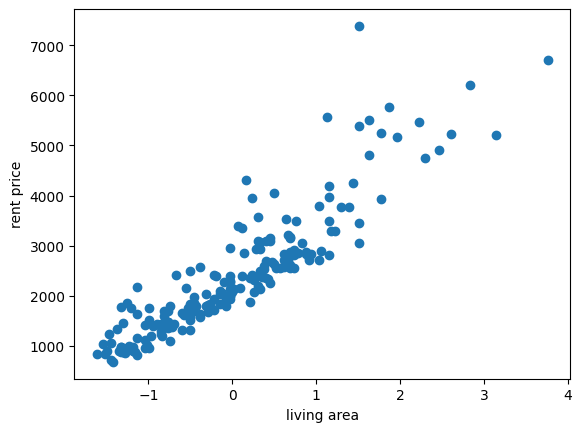

In [355]:
# Normalisation
x_mean = np.mean(x_n)
x_std = np.std(x_n)
x_scaled = (x_n - x_mean) / x_std

plt.scatter(x_scaled, y_n)
plt.xlabel("living area")
plt.ylabel("rent price")
plt.show()

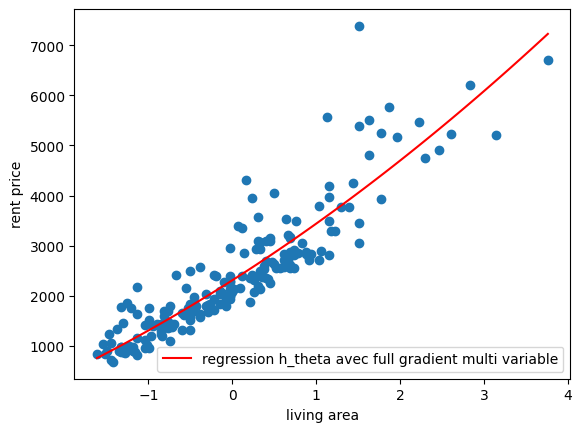

In [356]:
nb_ite = 10000
alpha = 0.01

theta_full_gradient_multivar = gradient_descent_multi_variable(nb_ite, x_scaled, x_scaled, y_n, alpha)
x_plot = np.linspace(min(x_scaled), max(x_scaled), 100)
y_plot = theta_full_gradient_multivar[0] + theta_full_gradient_multivar[1] * x_plot + theta_full_gradient_multivar[2] * x_plot**2

plt.scatter(x_scaled, y_n)
plt.plot(x_plot, y_plot, label="regression h_theta avec full gradient multi variable", color='red')
plt.xlabel("living area")
plt.ylabel("rent price")
plt.legend()
plt.show()

In [357]:
X_multi_sq = np.column_stack((np.ones(N), x_scaled, x_scaled))   # shape (N, 3)

print("cost value closed form = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))
print("cost value full gradient descent avec 1000 itérations et alpha = 0.000001 : ", cost_value(theta_full_gradient[0], theta_full_gradient[1], x_n, y_n))
print("cost value full gradient multi variable (x1,x2) avec 1000 itérations et alpha = 0.01 : ", cost_value_multi(X_multi_sq, y_n, theta_full_gradient_multivar, N))

cost value closed form =  138034.95779787414
cost value full gradient descent avec 1000 itérations et alpha = 0.000001 :  144159.35280506394
cost value full gradient multi variable (x1,x2) avec 1000 itérations et alpha = 0.01 :  140235.47658634352


**ANSWER** : En faisant une regression de degré 2 en mettant au carré la living area, **on réduit significativement l'erreur**, en passant de 4.24% (144159) à 1.56% (140235)

b) Implement one of the gradient descent algorithm (ex. 3-5) for the multi-variable linear
regression assuming x1 being the living area and x2 the number of bedrooms. Do you
observe a reduction in the loss ?

In [358]:
x1 = np.array(dataset["living_area"])
x2 = np.array(dataset["nb_rooms"])

# Normalisation
x1_mean = np.mean(x1)
x1_std = np.std(x1)
x1_scaled = (x1 - x1_mean) / x1_std

x2_mean = np.mean(x2)
x2_std = np.std(x2)
x2_scaled = (x2 - x2_mean) / x2_std

theta_full_gradient_multivar = gradient_descent_multi_variable(nb_ite, x1_scaled, x2_scaled, y_n, alpha)

features = dataset[["living_area", "nb_rooms"]].values
X_multi = np.column_stack((np.ones(N), x1_scaled, x2_scaled))   # shape (N, 3)


In [359]:
print("cost value closed form = ", cost_value(theta_closed_form[0], theta_closed_form[1], x_n, y_n))
print("cost value full gradient descent avec 1000 itérations et alpha = 0.000001 : ", cost_value(theta_full_gradient[0], theta_full_gradient[1], x_n, y_n))
print("cost value full gradient multi variable (x1,x2) avec 1000 itérations et alpha = 0.01 : ", cost_value_multi(X_multi, y_n, theta_full_gradient_multivar, N))

cost value closed form =  138034.95779787414
cost value full gradient descent avec 1000 itérations et alpha = 0.000001 :  144159.35280506394
cost value full gradient multi variable (x1,x2) avec 1000 itérations et alpha = 0.01 :  145578.36296173214


**ANSWER** : en ajoutant une feature pour faire une régression linéaire, on n'observe pas de réduction de l'erreur mais plutôt une légère augmentation (passe de 144159 à 145578)